In [393]:
# this part of the codes fetches requirements
import hashlib
from phe import paillier
import random as rd
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# import numpy as np

In [394]:
listOfIDS = []
dictionaryOfPublicKeys = {}
dictionaryOfPrivateKeys = {}
dictionaryOfRandomNumbers = {}
dictionaryOfBids = {}
finalSubmittedDataFirstPhase = [] #will be sused to stored the final resuklt of the two bidder for bid submission
highestbidder = 0 
numberOfBidders = 0 
publicKeyAuc, privateKeyAuc = 0, 0

In [395]:
#  this part of the code creates unique BID for all participants by the centeral authority
def createBidderAndKeys(n):
      global numberOfBidders,dictionaryOfPublicKeys,dictionaryOfPrivateKeys,publicKeyAuc,privateKeyAuc
      numberOfBidders = n
      dictionaryOfPublicKeys = {}
      dictionaryOfPrivateKeys = {}
      publicKeyAuc = 0
      privateKeyAuc = 0
      for i in range(0,numberOfBidders):
        i = str(i)
        listOfIDS.append(hashlib.sha256(i.encode('utf-8')).hexdigest())
      i = 0
      #this part creates the key pairs for all participants
      publicKeyAuc, privateKeyAuc = paillier.generate_paillier_keypair(n_length= 128)
      for i in range(0, numberOfBidders):
         x,y = paillier.generate_paillier_keypair(n_length=256)
         dictionaryOfPublicKeys[listOfIDS[i]],dictionaryOfPrivateKeys[listOfIDS[i]]  = x ,y
      i = 0

end of the Registration phase and start of Bid Submission Phase

In [396]:
# this part of the code generate random number and distinct bid values for all bidders and Auctioneer
def  createRandomNumberAndBids():
    global dictionaryOfBids,dictionaryOfRandomNumbers
    dictionaryOfBids = {}
    dictionaryOfRandomNumbers = {}
    bids  = rd.sample(range(1, numberOfBidders * 10 ), numberOfBidders)
    for i in range(0,numberOfBidders):
        r  = rd.randint(1,2000)
        dictionaryOfRandomNumbers[listOfIDS[i]] =  r
        dictionaryOfBids[listOfIDS[i]] = bids[i]
    i = 0
    # print(dictionaryOfBids)
    # print(dictionaryOfRandomNumbers)


In [397]:
# this PART OF THE CODE SIMULATES BIDDER GENERATING PRODUCT AND THAN SENDING TO NEXT BIDDER
def initFirstPhase():
    global finalSubmittedDataFirstPhase
    finalSubmittedDataFirstPhase = []
    for i in range(0,numberOfBidders):
        id = listOfIDS[i]
        dataPerBidder= []
        # print(dictionaryOfBids[id] * dictionaryOfRandomNumbers[id])
        encrytionOfBidAndRandomNumber = publicKeyAuc.raw_encrypt(dictionaryOfBids[id] + dictionaryOfRandomNumbers[id])
        # this part of code is forwarding the encrytionOfBidAndRandomNumber to all other bidders and after addition of the random number of the next bidder it is sent to the Auctioneer immediately
        for j in range(0,numberOfBidders):
            if j != i:
                idOfNextBidder = listOfIDS[j]
                pubKeyNextBidder, priKeyNextBidder= dictionaryOfPublicKeys[idOfNextBidder],dictionaryOfPrivateKeys[idOfNextBidder]
                e = pubKeyNextBidder.raw_encrypt(encrytionOfBidAndRandomNumber)
                e = priKeyNextBidder.raw_decrypt(e)
                encrytionOfBidAndBothRandomNumber = e * pow(publicKeyAuc.g,dictionaryOfRandomNumbers[idOfNextBidder])
                # this part of the code simulates the storing of the data of the bid summision to auctioneer data
                dataPerBidder.append(privateKeyAuc.raw_decrypt(encrytionOfBidAndBothRandomNumber))
            else:
                dataPerBidder.append(0)
        finalSubmittedDataFirstPhase.append(dataPerBidder)
    i,j = 0,0

here before declaring the winner auctioneer verifies if the bid inforamtion submitted by each bidder is correct or not

In [398]:
#this part of the code checks if all the entered values for SMPC are correct or not
# this works for a step of one
def verifyTheData():
    # for i in range(numberOfBidders):
    #     sum = 0
    #     for j in range(numberOfBidders):
    #         if j + i < numberOfBidders:
    #             sum = sum + finalSubmittedDataFirstPhase[j][j+i]
    #         else:
    #             sum = sum + finalSubmittedDataFirstPhase[j][(j+i)% numberOfBidders]
    #     # print(sum) 
    # .........................................................................#...........................................  
    # this works for any random step that has been taken in range (1,numberOfBidders) 
    k = rd.randint(1,9)
    print(k)
    for i in range(numberOfBidders-1):
        sum = 0
        for j in range(numberOfBidders):
            if j + k < numberOfBidders:
                sum = sum + finalSubmittedDataFirstPhase[j][j+k]
            else:
                #we took the mod so that the next bidder value should come to the range from the number of the bidders
                sum = sum + finalSubmittedDataFirstPhase[j][(j+k)% numberOfBidders]
        # print(sum)  
    i,j = 0,0

In [399]:
# this function chjoosews the best buyer based on the comparison it works as the auctrioneer is comparing each pair

def chooseBestBuyer():
    global highestbidder
    highestbidder = {}
    for i in range(0,numberOfBidders):
        highestbidder = i
        for j in range(0,numberOfBidders):
            if i != j:
                if finalSubmittedDataFirstPhase[i][j] < finalSubmittedDataFirstPhase[j][i]:
                    highestbidder  = j
                    i = j
            else:
                continue
    i = 0

In [400]:
def plotGraph(xPoints, yPoints):
    plt.figure()
    plt.plot(xPoints, yPoints, marker = "*")
    plt.xlabel("bidderSizes")
    plt.ylabel("timeConsumed")
    plt.show()

the following code starts the simulation of the auction


In [401]:
def runTheSimulation(m, h):
    createBidderAndKeys(m)
    createRandomNumberAndBids()
    initFirstPhase()
    verifyTheData()
    chooseBestBuyer()
    # plotGraph(bidderSizes, timeConsumed,h)
    




# runTheSimulation(20)
# for i in range(len(finalSubmittedDataFirstPhase)):
#     print(finalSubmittedDataFirstPhase[i])
# i = 0
# print(highestbidder)
# dictionaryOfBids

1


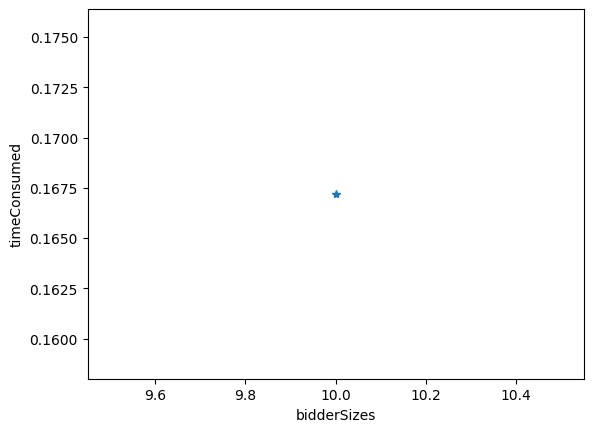

0.16719630299485289
3


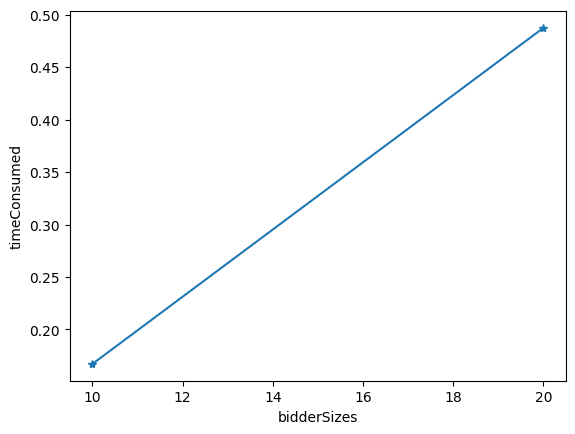

0.4873772069986444
9


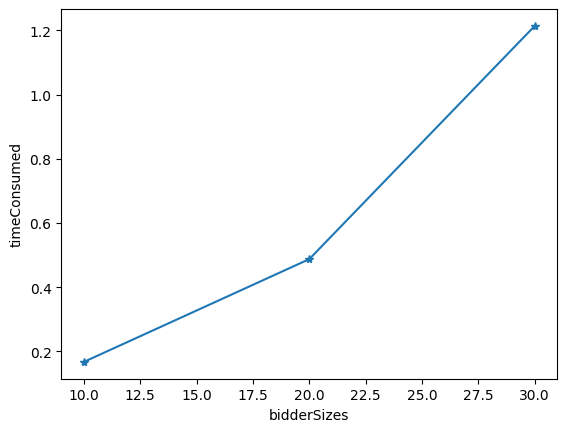

1.213809067994589
2


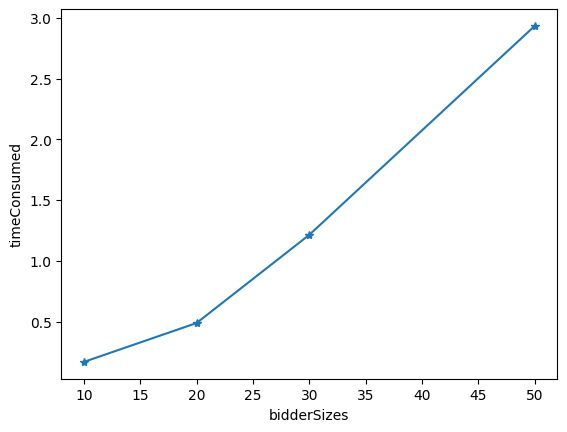

2.934422814010759
7


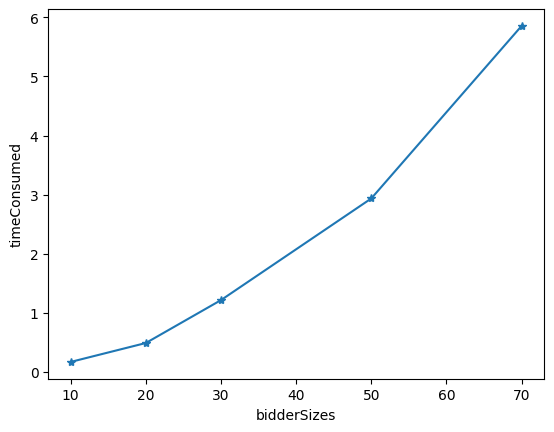

5.8550069729972165
6


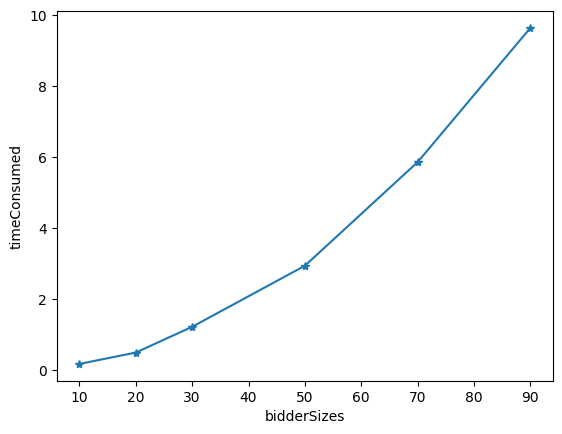

9.63672455199412
6


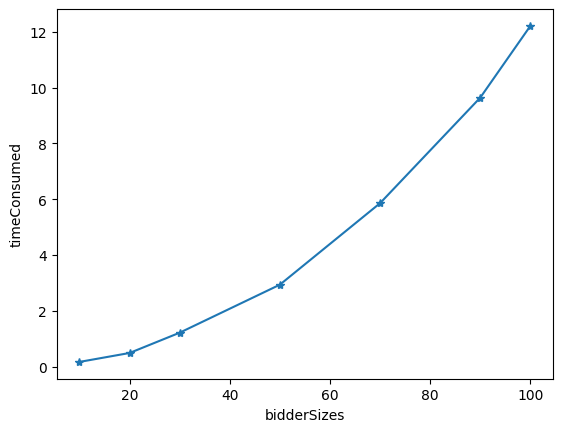

12.206834498996614
9


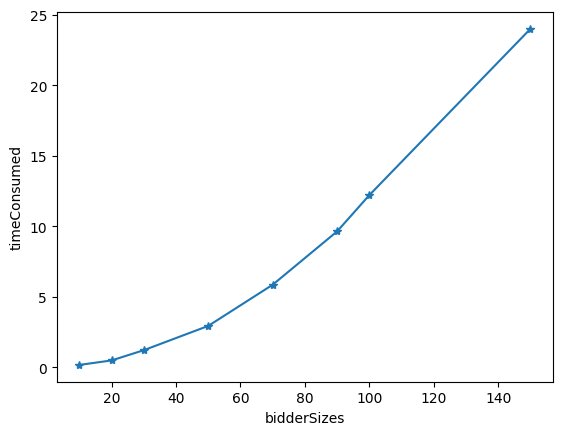

23.9951338259998
4


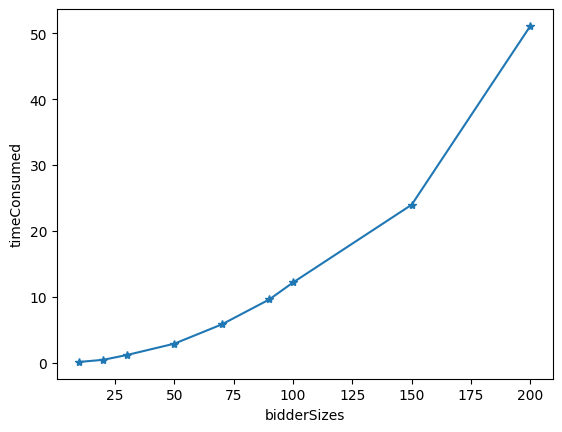

51.095887121002306
9


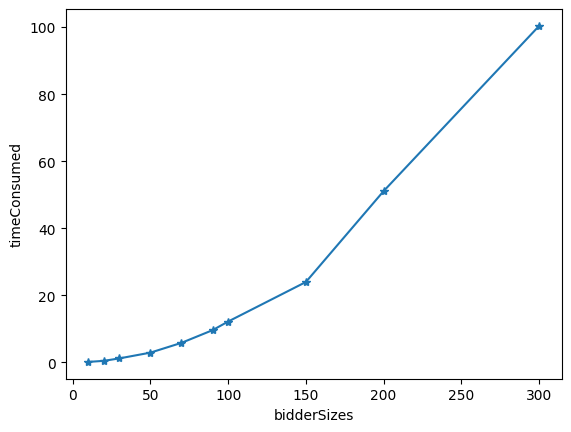

100.34496042199316
6


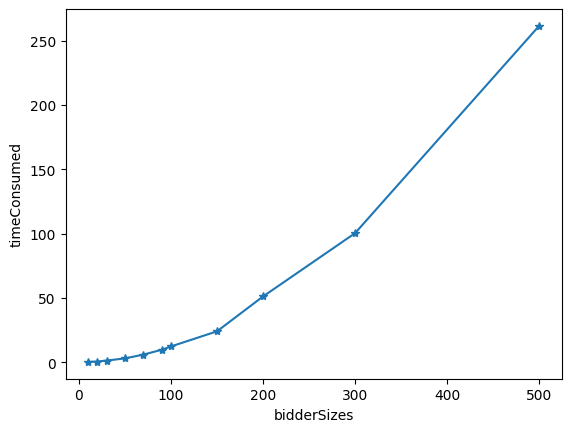

261.60752197299735
4


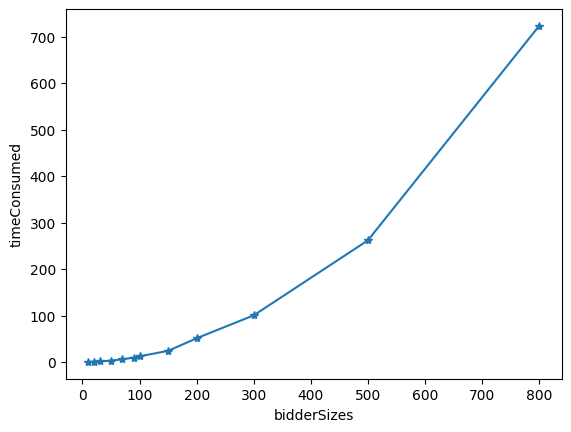

722.8672523529967
3


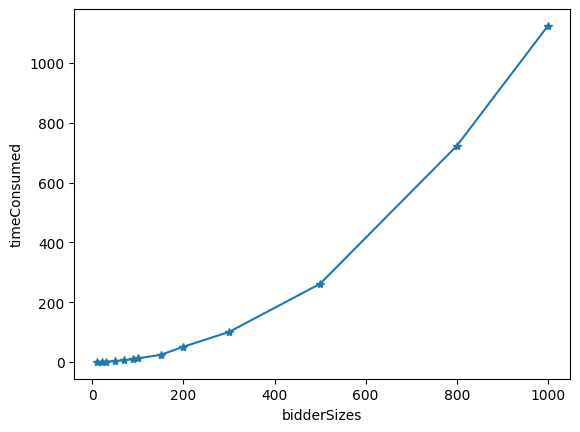

1124.2334114210098


In [402]:
bidderSizes = [10,20,30,50,70,90,100,150,200,300,500,800,1000,5000,10000]
timeConsumed = []
for h in range(len(bidderSizes)):
    start =  timer()
    runTheSimulation(bidderSizes[h],h+1)
    end  = timer()
    timeConsumed.append(end - start)
    plotGraph(bidderSizes[0:h+1], timeConsumed)
    print(timeConsumed[h])
    



